# Breast Cancer Prediction

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

In [5]:
from pandas import DataFrame

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('data.csv')

In [8]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [9]:
data.shape

(569, 6)

In [10]:
data['diagnosis'].nunique()

2

In [11]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [13]:
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

No Null values

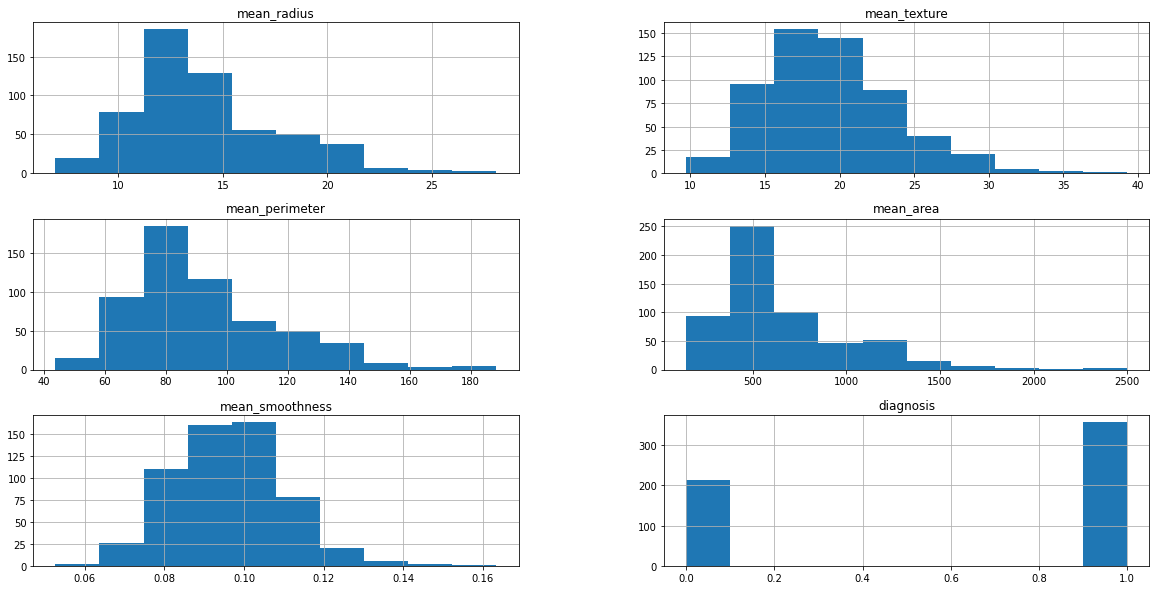

In [14]:
data.hist(figsize=(20,10))
plt.show()

some of the features are represents Guassion distribution and others are left-skewed distribution

C:\Users\razi\anaconda3\envs\Breast_cancer_classification\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

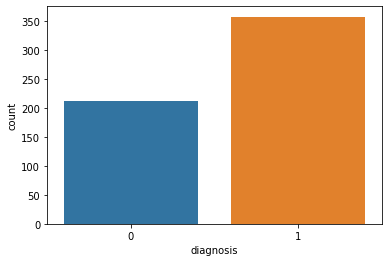

In [15]:
sns.countplot(data['diagnosis'], label = "Count")

In [16]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

# Checking Outliers

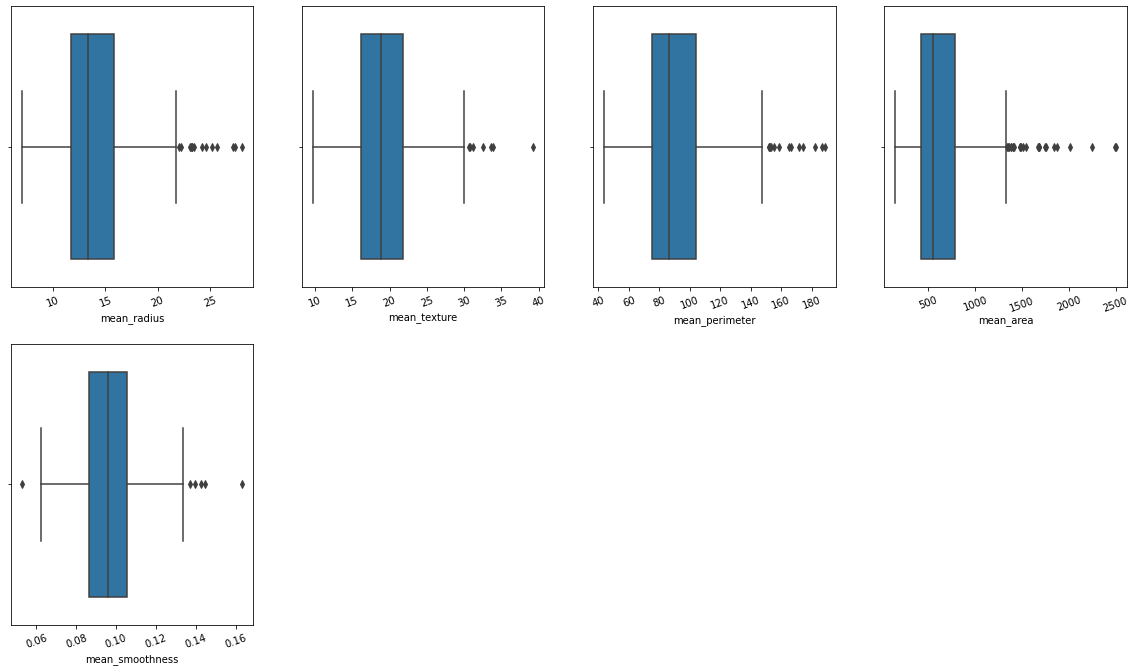

In [17]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,30))
features = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xticks(rotation = 20)

In [18]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [19]:
df=data[data['diagnosis']==0]

In [20]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [21]:
df['mean_radius'].value_counts(bins=10, sort=False)

(10.932, 12.666]     9
(12.666, 14.382]    28
(14.382, 16.098]    43
(16.098, 17.814]    35
(17.814, 19.53]     41
(19.53, 21.246]     37
(21.246, 22.962]     7
(22.962, 24.678]     7
(24.678, 26.394]     2
(26.394, 28.11]      3
Name: mean_radius, dtype: int64

#so we don't have to remove outliers

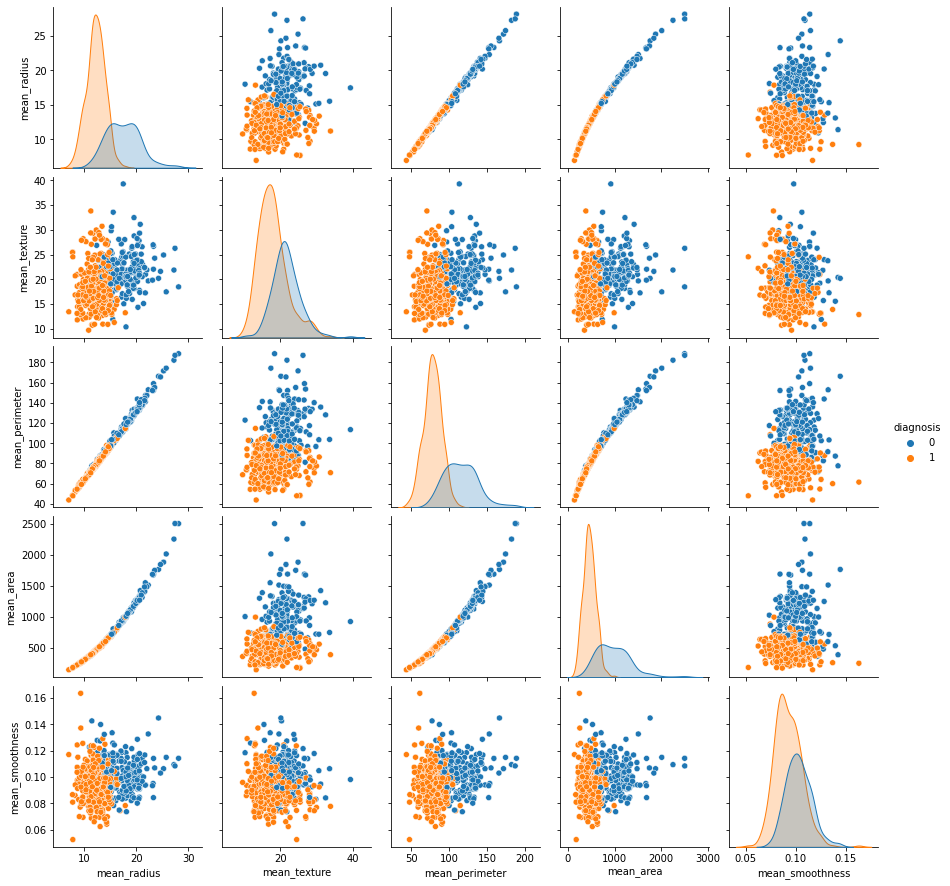

In [22]:
sns.pairplot(data, hue='diagnosis', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'])

# Feature reduction

### Checking correlation

<AxesSubplot:>

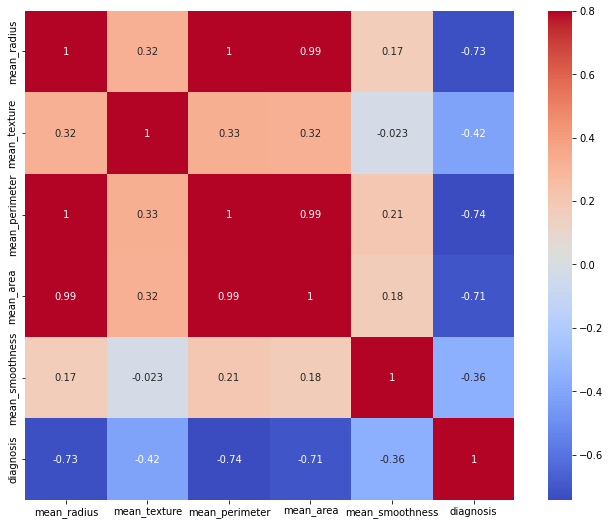

In [23]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="coolwarm", vmax=.8, square=True, annot= True)

mean_radius and mean_area has high correlation. we can remove one of them and mean_radius has low correation compared to diagnosis. so we can remove them.

In [24]:
data.drop(['mean_radius','mean_area'],axis=1,inplace=True)

In [25]:
data.head()

,mean_texture,mean_perimeter,mean_smoothness,diagnosis
0,10.38,122.80,0.11840,0
1,17.77,132.90,0.08474,0
2,21.25,130.00,0.10960,0
3,20.38,77.58,0.14250,0
4,14.34,135.10,0.10030,0


## Feature scaling

### Before scaling

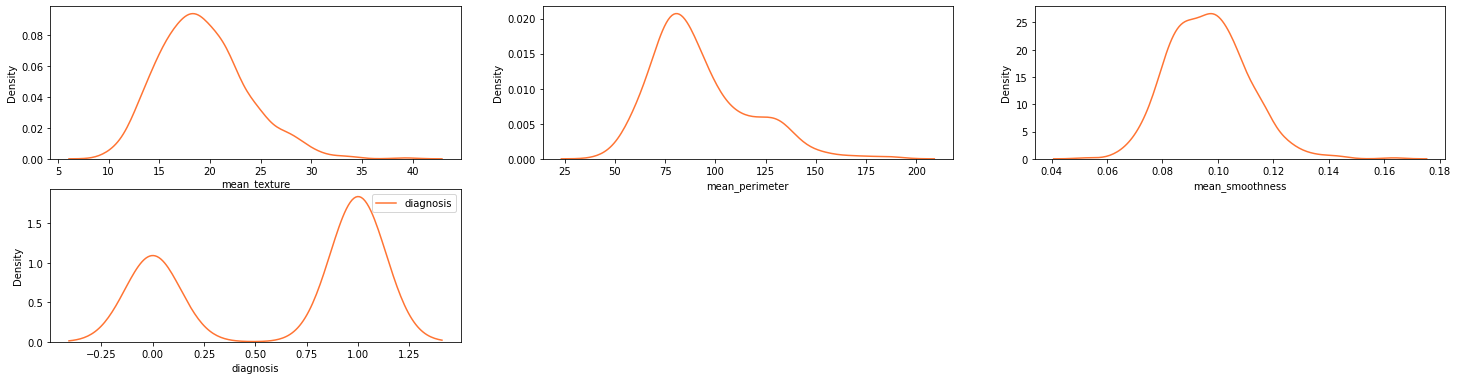

In [26]:
plt.figure(figsize=(25,23))
plt.title('Before Scaling', fontsize=18)
for i in enumerate(data): 
    ax = plt.subplot(7, 3, i[0]+1)   
    sns.kdeplot(data[i[1]], color ='#FF7433', label=i[1])
plt.legend(fontsize=10)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [30]:
X_train.head()

,mean_texture,mean_perimeter,mean_smoothness
68,17.33,58.79,0.10660
181,26.57,142.70,0.11410
63,13.86,59.20,0.07721
248,25.22,68.01,0.09657
60,14.88,64.55,0.11340


In [31]:
X_test.shape

(114, 3)

In [32]:
y_train.shape

(455,)

In [33]:
sc = StandardScaler()
cols = ['mean_texture', 'mean_perimeter', 'mean_smoothness']
X_train[cols]= sc.fit_transform(X_train[cols])
X_test[cols]= sc.transform(X_test[cols])


### After scaling

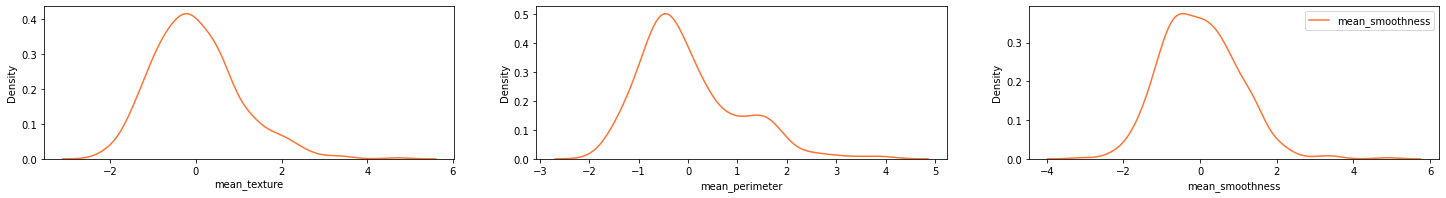

In [34]:
plt.figure(figsize=(25,23))
plt.title('Before Scaling', fontsize=18)
for i in enumerate(X_train): 
    ax = plt.subplot(7, 3, i[0]+1)   
    sns.kdeplot(X_train[i[1]], color ='#FF7433', label=i[1])
plt.legend(fontsize=10)

# Model creation

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [36]:
from sklearn.metrics import f1_score, confusion_matrix

In [37]:
f1_score(y_test,y_pred)

0.951048951048951

In [38]:
confusion_matrix(y_test,y_pred)

array([[39,  4],
       [ 3, 68]], dtype=int64)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [40]:
f1_score(y_test,y_pred)

0.9640287769784172

# KNN

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
acc=[]
neighbors=np.arange(3,15)
for i in neighbors:
    classifiers = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
    classifiers.fit(X_train,y_train)
    y_pred = classifiers.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy)

In [46]:
acc

[0.9298245614035088,
 0.9035087719298246,
 0.9122807017543859,
 0.9122807017543859,
 0.9298245614035088,
 0.9035087719298246,
 0.9122807017543859,
 0.9122807017543859,
 0.9210526315789473,
 0.9210526315789473,
 0.9298245614035088,
 0.9122807017543859]

Text(0, 0.5, 'Accuracy')

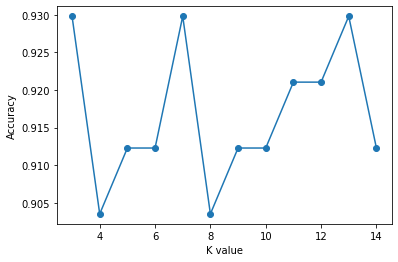

In [47]:
plt.plot(neighbors, acc, '-o')
plt.xlabel('K value')
plt.ylabel('Accuracy')

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
df_model = DecisionTreeClassifier()
df_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred=df_model.predict(X_test)

In [51]:
print('Accuracy score :',accuracy_score(y_test,y_pred))

Accuracy score : 0.9035087719298246


In [52]:
confusion_matrix(y_test,y_pred)

array([[39,  4],
       [ 7, 64]], dtype=int64)

# SVM

In [53]:
from sklearn.svm import SVC

In [55]:
svm_linear = SVC(kernel='linear')

In [56]:
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [57]:
y_pred = svm_linear.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.9298245614035088

In [59]:
confusion_matrix(y_test,y_pred)

array([[38,  5],
       [ 3, 68]], dtype=int64)

### Standardizing features

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [61]:
svm_linear = SVC(kernel='linear')

In [62]:
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [63]:
y_pred = svm_linear.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.9473684210526315

## polynomial SVM

In [66]:
svm_poly = SVC(kernel='poly', degree=3)

In [67]:
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [68]:
y_pred = svm_poly.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred)

0.8859649122807017

The accuracy score is decreased now. so not move with it.

# Hyperparameter Tuning

## RandomizedSearchCV

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

In [87]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 272, 445, 618, 790, 963, 1136, 1309, 1481, 1654, 1827, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [88]:
# Random search of parameters, using 5 fold cross validation, 
# # search across 100 different combinations
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =25, cv = 5, verbose=2,random_state=42)

In [89]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END criterion=gini, max_depth=230, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1827; total time=   3.4s
[CV] END criterion=gini, max_depth=230, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1827; total time=   3.3s
[CV] END criterion=gini, max_depth=230, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1827; total time=   3.9s
[CV] END criterion=gini, max_depth=230, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1827; total time=   3.8s
[CV] END criterion=gini, max_depth=230, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1827; total time=   3.4s
[CV] END criterion=entropy, max_depth=120, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1481; total time=   2.7s
[CV] END criterion=entropy, max_depth=120, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_es

[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=100, n_estimators=1481; total time=   2.8s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=100, n_estimators=1481; total time=   2.6s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2000; total time=   3.7s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2000; total time=   3.4s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2000; total time=   3.4s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2000; total time=   3.4s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2000; total time=   3.3s
[CV] END criterion=gini, max

[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=1481; total time=   2.5s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=1481; total time=   2.6s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=1481; total time=   2.5s
[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1309; total time=   2.1s
[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1309; total time=   2.5s
[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1309; total time=   2.1s
[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1309; total time=   2.2s
[C

{'n_estimators': 1309,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'entropy'}

In [90]:
rf = RandomForestClassifier()
rf_random = RandomForestClassifier(n_estimators = 1654, min_samples_split = 10, min_samples_leaf = 1, max_features =  'auto', max_depth = 450)

In [91]:
rf_random.fit(X_train,y_train)
y_pred = rf_random.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred)

0.9736842105263158

# Checking prediction

In [94]:
import pickle

In [95]:
filename = 'cancer.pkl'
pickle.dump(rf_random,open(filename,'wb'))

In [96]:
load_model = pickle.load(open(filename,'rb'))

In [99]:
res_pred =  load_model.predict([[18.01,54.02,0.1945]])

In [100]:
if res_pred==0:
    print('No cancer')
else:
    print('Cancer')

No cancer
